In [ ]:
print("hi")

hi


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving C9142.pdf to C9142.pdf
Saving C9146.pdf to C9146.pdf
Saving C9165.pdf to C9165.pdf
Saving C9200.pdf to C9200.pdf
Saving C9207.pdf to C9207.pdf
Saving C9228.pdf to C9228.pdf
Saving C9262.pdf to C9262.pdf
Saving C9282.pdf to C9282.pdf
Saving C9342.pdf to C9342.pdf
Saving C9369.pdf to C9369.pdf
Saving C9533.pdf to C9533.pdf
Saving C9534.pdf to C9534.pdf
Saving C9567.pdf to C9567.pdf
Saving C9590.pdf to C9590.pdf
Saving C9628.pdf to C9628.pdf
Saving C9677.pdf to C9677.pdf
Saving C9742.pdf to C9742.pdf
Saving C9777.pdf to C9777.pdf
Saving C9779.pdf to C9779.pdf
Saving C9884.pdf to C9884.pdf
Saving C9897.pdf to C9897.pdf
Saving C9919.pdf to C9919.pdf
Saving C9945.pdf to C9945.pdf
Saving C7842.pdf to C7842.pdf
Saving C7869.pdf to C7869.pdf
Saving C7934.pdf to C7934.pdf
Saving C7979.pdf to C7979.pdf
Saving C7996.pdf to C7996.pdf
Saving C8035.pdf to C8035.pdf
Saving C8063.pdf to C8063.pdf
Saving C8203.pdf to C8203.pdf
Saving C8239.pdf to C8239.pdf
Saving C8398.pdf to C8398.pdf
Saving C84

In [ ]:
import shutil
import os

dataset_path = "/content/JobScreeningDataset"
os.makedirs(dataset_path, exist_ok=True)

for filename in uploaded.keys():
    shutil.move(filename, os.path.join(dataset_path, filename))

print("Files moved to:", dataset_path)


Files moved to: /content/JobScreeningDataset


In [ ]:
!pip install pymupdf


In [ ]:
!pip install PyPDF2

In [ ]:
!pip uninstall -y fitz  # Remove the wrong 'fitz'
!pip uninstall -y pymupdf  # Clean slate
!pip install PyMuPDF  # Correct installation


Found existing installation: fitz 0.0.1.dev2
Uninstalling fitz-0.0.1.dev2:
  Successfully uninstalled fitz-0.0.1.dev2
Found existing installation: PyMuPDF 1.25.5
Uninstalling PyMuPDF-1.25.5:
  Successfully uninstalled PyMuPDF-1.25.5
  Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (20.0 MB)


In [ ]:
#1


import os
import re
import fitz  # PyMuPDF
import pandas as pd

# Define regex patterns
EMAIL_PATTERN = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"
MOBILE_PATTERN = r"\+?\d{10,13}"
EDUCATION_PATTERN = r"(bachelor|master|b\.tech|m\.tech|bsc|msc|mba|be|me)"
EXPERIENCE_YEAR_PATTERN = r"(\d{4})-(\d{4})"

# List of skills (Expand as needed)
ALL_SKILLS = {
    "python", "java", "c++", "sql", "machine learning", "deep learning", "nlp",
    "aws", "azure", "gcp", "docker", "kubernetes", "network security", "linux",
    "firewall", "metasploit", "wireshark", "figma", "adobe xd", "user research", "prototyping"
}

def extract_text_from_pdf(pdf_path):
    """Extracts full text from a PDF."""
    with fitz.open(pdf_path) as doc:
        text = "\n".join([page.get_text("text") for page in doc])
    return text.lower()  # Convert to lowercase for uniform processing

def parse_resume(text):
    """Extracts candidate details from a resume."""
    data = {
        "candidate_id": None,
        "name": None,
        "email": None,
        "mobile": None,
        "education": [],
        "experience": 0,
        "skills": []
    }

    # Extract Candidate ID (first line)
    candidate_id_match = re.search(r"candidate resume \(id:\s*(c\d+)\)", text)
    if candidate_id_match:
        data["candidate_id"] = candidate_id_match.group(1)

    # Extract Email
    email_match = re.search(EMAIL_PATTERN, text)
    if email_match:
        data["email"] = email_match.group()

    # Extract Mobile
    mobile_match = re.search(MOBILE_PATTERN, text)
    if mobile_match:
        data["mobile"] = mobile_match.group()

    # Extract Education (without years)
    education_matches = re.findall(EDUCATION_PATTERN, text)
    data["education"] = list(set(education_matches)) if education_matches else ["Not Found"]

    # Extract Work Experience Section
    experience_section = re.search(r"work experience([\s\S]+)", text)
    total_experience = 0
    if experience_section:
        experience_text = experience_section.group(1)
        experience_matches = re.findall(EXPERIENCE_YEAR_PATTERN, experience_text)
        for start, end in experience_matches:
            total_experience += int(end) - int(start)
    data["experience"] = total_experience

    # Extract Skills (Check in multiple sections)
    found_skills = [skill for skill in ALL_SKILLS if skill in text]
    data["skills"] = found_skills if found_skills else ["Not Found"]

    return data

# Directory containing resume PDFs
pdf_folder = "/content/JobScreeningDataset"  # Upload the folder in Colab

# Process all PDFs in the folder
resume_data = []
for filename in os.listdir(pdf_folder):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, filename)
        text = extract_text_from_pdf(pdf_path)
        parsed_data = parse_resume(text)
        parsed_data["filename"] = filename
        resume_data.append(parsed_data)

# Convert extracted data into DataFrame
resume_df = pd.DataFrame(resume_data, columns=["filename", "candidate_id", "name", "email", "mobile", "education", "experience", "skills"])

# Display results
resume_df.head()

# # Save as CSV
# resume_df.to_csv("extracted_resumes.csv", index=False)


,filename,candidate_id,name,email,mobile,education,experience,skills
0,C7554.pdf,c7554,None,amandamiller19@gmail.com,None,"[bachelor, me, be]",8,"[machine learning, docker, aws, kubernetes, sq..."
1,C7543.pdf,c7543,None,joelsmith39@gmail.com,None,"[me, be]",8,"[linux, wireshark, metasploit, network security]"
2,C7733.pdf,c7733,None,juliagates85@gmail.com,None,"[master, bachelor, me, be]",8,"[gcp, deep learning, docker, aws, azure, kuber..."
3,C5786.pdf,c5786,None,angelatate96@gmail.com,None,"[master, me, be]",4,"[machine learning, docker, kubernetes, network..."
4,C1164.pdf,c1164,None,deborahfoster16@gmail.com,None,"[bachelor, me, be]",8,"[docker, aws, kubernetes, sql, python]"


In [ ]:
#2
import pandas as pd

# Define job requirements
job_requirements = {
    "Software Engineer": {
        "skills": {"python", "java", "c++", "c#", "javascript", "typescript", "sql", "nosql",
                   "cloud computing", "docker", "kubernetes", "aws", "azure", "gcp",
                   "git", "agile methodologies", "linux", "rest api", "microservices",
                   "data structures", "algorithms", "react", "angular", "vue.js"},
        "education": {"bachelor", "master", "be", "me"},
        "experience": 2
    },
    "Data Scientist": {
        "skills": {"python", "r", "sql", "machine learning", "deep learning", "nlp",
                   "tensorflow", "pytorch", "scikit-learn", "pandas", "numpy", "matplotlib",
                   "big data", "hadoop", "spark", "data visualization", "statistical modeling",
                   "time series analysis", "bayesian statistics", "computer vision"},
        "education": {"bachelor", "master", "msc"},
        "experience": 3
    },
    "Product Manager": {
        "skills": {"leadership", "product management", "market research", "business strategy",
                   "roadmap planning", "agile methodologies", "stakeholder management",
                   "ux/ui", "data analysis", "user research", "design thinking", "go-to-market strategy",
                   "competitive analysis", "pricing strategies"},
        "education": {"mba", "bachelor"},
        "experience": 5
    },
    "Cloud Engineer": {
        "skills": {"aws", "azure", "gcp", "docker", "kubernetes", "terraform", "ansible",
                   "ci/cd", "devops", "networking", "linux", "shell scripting", "serverless computing",
                   "cloud security", "auto-scaling", "virtualization"},
        "education": {"bachelor", "master", "be", "me"},
        "experience": 3
    },
    "Cybersecurity Analyst": {
        "skills": {"network security", "linux", "firewall", "metasploit", "wireshark",
                   "penetration testing", "ethical hacking", "incident response", "forensics",
                   "security information and event management (siem)", "compliance",
                   "zero trust security", "identity and access management"},
        "education": {"bachelor", "be", "me"},
        "experience": 2
    },
    "Machine Learning Engineer": {
        "skills": {"python", "tensorflow", "pytorch", "scikit-learn", "deep learning",
                   "computer vision", "nlp", "reinforcement learning", "big data",
                   "data engineering", "feature engineering", "mlops"},
        "education": {"bachelor", "master", "phd"},
        "experience": 3
    },
    "DevOps Engineer": {
        "skills": {"docker", "kubernetes", "ci/cd", "terraform", "ansible", "jenkins",
                   "cloud computing", "aws", "azure", "gcp", "linux", "networking",
                   "scripting", "python", "bash", "gitlab", "monitoring tools"},
        "education": {"bachelor", "master"},
        "experience": 3
    },
    "Full Stack Developer": {
        "skills": {"html", "css", "javascript", "typescript", "react", "angular", "vue.js",
                   "node.js", "express.js", "django", "flask", "sql", "nosql", "mongodb",
                   "graphql", "rest api", "microservices"},
        "education": {"bachelor", "be", "me"},
        "experience": 3
    },
    "Big Data Engineer": {
        "skills": {"hadoop", "spark", "kafka", "python", "scala", "java", "nosql", "sql",
                   "etl", "data warehousing", "cloud computing", "aws", "azure", "gcp"},
        "education": {"bachelor", "master"},
        "experience": 3
    },
    "AI Researcher": {
        "skills": {"machine learning", "deep learning", "computer vision", "nlp",
                   "reinforcement learning", "tensorflow", "pytorch", "bayesian statistics",
                   "generative models", "robotics", "data science"},
        "education": {"master", "phd"},
        "experience": 5
    },
    "Database Administrator": {
        "skills": {"sql", "nosql", "mysql", "postgresql", "mongodb", "oracle", "sql server",
                   "database design", "data security", "performance tuning"},
        "education": {"bachelor", "be", "me"},
        "experience": 3
    },
    "Network Engineer": {
        "skills": {"network security", "firewalls", "switches", "routers", "tcp/ip", "dns",
                   "wireshark", "vpn", "cloud networking", "cisco", "load balancing"},
        "education": {"bachelor", "ccna", "ccnp"},
        "experience": 2
    },
    "Software Architect": {
        "skills": {"software design", "microservices", "system architecture", "design patterns",
                   "cloud architecture", "scalability", "enterprise software"},
        "education": {"bachelor", "master"},
        "experience": 5
    },
    "Blockchain Developer": {
        "skills": {"solidity", "ethereum", "smart contracts", "web3.js", "rust",
                   "hyperledger", "blockchain security", "decentralized finance (defi)",
                   "cryptography", "nft development", "distributed ledger technology"},
        "education": {"bachelor", "master"},
        "experience": 2
    },
    "IT Project Manager": {
        "skills": {"project management", "scrum", "agile", "stakeholder management",
                   "budgeting", "risk management", "team leadership", "communication"},
        "education": {"mba", "pmp"},
        "experience": 5
    },
    "Business Intelligence Analyst": {
        "skills": {"sql", "tableau", "power bi", "data visualization", "business strategy",
                   "reporting", "data warehousing", "big data", "analytics"},
        "education": {"bachelor", "master"},
        "experience": 3
    },
    "Robotics Engineer": {
        "skills": {"robotics", "control systems", "ros", "computer vision", "c++", "python",
                   "mechatronics", "hardware interfacing", "automation"},
        "education": {"bachelor", "master", "phd"},
        "experience": 3
    },
    "Embedded Systems Engineer": {
        "skills": {"c", "c++", "rtos", "microcontrollers", "fpga", "pcb design",
                   "iot protocols", "wireless communication", "hardware debugging",
                   "low-level programming"},
        "education": {"bachelor", "master"},
        "experience": 3
    },
    "Quality Assurance Engineer": {
        "skills": {"test automation", "selenium", "pytest", "junit", "cypress", "bug tracking",
                   "performance testing", "api testing", "manual testing"},
        "education": {"bachelor", "be"},
        "experience": 2
    },
    "UX/UI Designer": {
        "skills": {"figma", "adobe xd", "sketch", "user research", "wireframing", "prototyping",
                   "usability testing", "interaction design", "design systems", "motion graphics",
                   "web accessibility", "color theory", "graphic design", "branding"},
        "education": {"bachelor", "design"},
        "experience": 1
    }
}


# Initialize columns for matching
resume_df["best_match"] = None
resume_df["match_score"] = 0.0
resume_df["shortlisted"] = "No"

# Iterate over candidates
for index, candidate in resume_df.iterrows():
    best_match = None
    best_score = 0

    # Convert lists to sets for comparison
    candidate_skills = set(candidate["skills"]) if isinstance(candidate["skills"], list) else set()
    candidate_education = set(candidate["education"]) if isinstance(candidate["education"], list) else set()
    candidate_experience = candidate["experience"]

    for job_title, job_info in job_requirements.items():
        # Skill Match (40%)
        matched_skills = candidate_skills & job_info["skills"]
        skill_score = (len(matched_skills) / len(job_info["skills"])) * 50 if job_info["skills"] else 0

        # Education Match (30%)
        matched_education = candidate_education & job_info["education"]
        education_score = (len(matched_education) / len(job_info["education"])) * 40 if job_info["education"] else 0

        # Experience Match (30%) - Normalized
        experience_score = min((candidate_experience / job_info["experience"]) * 40, 40) if job_info["experience"] else 0

        # Total Match Score
        total_score = skill_score + education_score + experience_score

        # Check for best match
        if total_score > best_score:
            best_score = total_score
            best_match = job_title

    # Update resume_df
    resume_df.at[index, "best_match"] = best_match
    resume_df.at[index, "match_score"] = round(best_score, 2)
    resume_df.at[index, "shortlisted"] = "Yes" if best_score >= 80 else "No"

# Display updated DataFrame
resume_df.head(10)
# resume_df.to_csv("output.csv", index=False)

,filename,candidate_id,name,email,mobile,education,experience,skills,best_match,match_score,shortlisted
0,C7554.pdf,c7554,None,amandamiller19@gmail.com,None,"[bachelor, me, be]",8,"[machine learning, docker, aws, kubernetes, sq...",Database Administrator,85.00,Yes
1,C7543.pdf,c7543,None,joelsmith39@gmail.com,None,"[me, be]",8,"[linux, wireshark, metasploit, network security]",Cybersecurity Analyst,82.05,Yes
2,C7733.pdf,c7733,None,juliagates85@gmail.com,None,"[master, bachelor, me, be]",8,"[gcp, deep learning, docker, aws, azure, kuber...",Big Data Engineer,97.86,Yes
3,C5786.pdf,c5786,None,angelatate96@gmail.com,None,"[master, me, be]",4,"[machine learning, docker, kubernetes, network...",Software Engineer,78.33,No
4,C1164.pdf,c1164,None,deborahfoster16@gmail.com,None,"[bachelor, me, be]",8,"[docker, aws, kubernetes, sql, python]",Database Administrator,85.00,Yes
5,C9677.pdf,c9677,None,andrewsloan82@gmail.com,None,[me],4,"[gcp, deep learning, aws, azure, network secur...",Cloud Engineer,59.38,No
6,C1677.pdf,c1677,None,shelleybartlett86@gmail.com,None,"[master, me]",4,"[machine learning, deep learning, aws, c++, py...",Big Data Engineer,67.14,No
7,C3821.pdf,c3821,None,fernandowalker39@gmail.com,None,"[master, me, be]",8,"[machine learning, docker, kubernetes, network...",Software Engineer,78.33,No
8,C3363.pdf,c3363,None,sarahwebb50@gmail.com,None,"[master, me, be]",8,"[machine learning, azure, network security, sq...",Software Engineer,76.25,No
9,C4602.pdf,c4602,None,davidhull82@gmail.com,None,"[me, be]",4,"[machine learning, docker, kubernetes, network...",Database Administrator,71.67,No


In [ ]:
resume_df[["candidate_id","name","shortlisted"]].head(10)


,candidate_id,name,shortlisted
0,c7554,None,Yes
1,c7543,None,Yes
2,c7733,None,Yes
3,c5786,None,No
4,c1164,None,Yes
5,c9677,None,No
6,c1677,None,No
7,c3821,None,No
8,c3363,None,No
9,c4602,None,No


In [ ]:
#3
import os
import re
import pandas as pd
from PyPDF2 import PdfReader

# Folder containing resume PDFs
resume_folder = "/content/JobScreeningDataset"

# Function to extract name from PDF
def extract_name_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = "\n".join(page.extract_text() for page in reader.pages if page.extract_text())

        # Try to extract name using "Name: XYZ" format
        name_match = re.search(r"Name[:\s]+([A-Z][a-z]+\s[A-Z][a-z]+)", text)
        if name_match:
            return name_match.group(1)

        # If no explicit "Name: XYZ" format, assume first 2 words are the name
        first_lines = text.split("\n")[:5]  # Take first few lines
        words = first_lines[0].split()
        if len(words) >= 2:
            return f"{words[0]} {words[1]}"  # Assume first two words are the name

    except Exception as e:
        print(f"Error extracting name from {pdf_path}: {e}")

    return "Unknown"

# List all PDFs in the folder
pdf_files = [f for f in os.listdir(resume_folder) if f.endswith(".pdf")]

# Create a dictionary to store names
resume_names = {}

# Extract names from each PDF
for pdf_file in pdf_files:
    pdf_path = os.path.join(resume_folder, pdf_file)
    name = extract_name_from_pdf(pdf_path)
    resume_names[pdf_file] = name

# Convert to DataFrame
names_df = pd.DataFrame(list(resume_names.items()), columns=["File Name", "Name"])

# Assuming resume_df already exists, match names with files
resume_df["Name"] = resume_df["filename"].map(resume_names)

# Display updated DataFrame
resume_df.head(10)

# Save if needed
# resume_df.to_csv("updated_resumes.csv", index=False)


,filename,candidate_id,name,email,mobile,education,experience,skills,best_match,match_score,shortlisted,Name
0,C7554.pdf,c7554,None,amandamiller19@gmail.com,None,"[bachelor, me, be]",8,"[machine learning, docker, aws, kubernetes, sq...",Database Administrator,85.00,Yes,Amanda Miller
1,C7543.pdf,c7543,None,joelsmith39@gmail.com,None,"[me, be]",8,"[linux, wireshark, metasploit, network security]",Cybersecurity Analyst,82.05,Yes,Joel Smith
2,C7733.pdf,c7733,None,juliagates85@gmail.com,None,"[master, bachelor, me, be]",8,"[gcp, deep learning, docker, aws, azure, kuber...",Big Data Engineer,97.86,Yes,Julia Gates
3,C5786.pdf,c5786,None,angelatate96@gmail.com,None,"[master, me, be]",4,"[machine learning, docker, kubernetes, network...",Software Engineer,78.33,No,Angela Tate
4,C1164.pdf,c1164,None,deborahfoster16@gmail.com,None,"[bachelor, me, be]",8,"[docker, aws, kubernetes, sql, python]",Database Administrator,85.00,Yes,Deborah Foster
5,C9677.pdf,c9677,None,andrewsloan82@gmail.com,None,[me],4,"[gcp, deep learning, aws, azure, network secur...",Cloud Engineer,59.38,No,Andrew Sloan
6,C1677.pdf,c1677,None,shelleybartlett86@gmail.com,None,"[master, me]",4,"[machine learning, deep learning, aws, c++, py...",Big Data Engineer,67.14,No,Shelley Bartlett
7,C3821.pdf,c3821,None,fernandowalker39@gmail.com,None,"[master, me, be]",8,"[machine learning, docker, kubernetes, network...",Software Engineer,78.33,No,Fernando Walker
8,C3363.pdf,c3363,None,sarahwebb50@gmail.com,None,"[master, me, be]",8,"[machine learning, azure, network security, sq...",Software Engineer,76.25,No,Sarah Webb
9,C4602.pdf,c4602,None,davidhull82@gmail.com,None,"[me, be]",4,"[machine learning, docker, kubernetes, network...",Database Administrator,71.67,No,David Hull


In [ ]:
#4

import pandas as pd
import os
import re
from PyPDF2 import PdfReader

# Folder containing resumes
resume_folder = "/content/JobScreeningDataset"  # Update with actual path

# Function to extract name from PDF
def extract_name_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = "\n".join(page.extract_text() for page in reader.pages if page.extract_text())

        # Try to find name in "Name: XYZ" format
        name_match = re.search(r"Name[:\s]+([A-Z][a-z]+\s[A-Z][a-z]+)", text)
        if name_match:
            return name_match.group(1)

        # Fallback: Assume first two words as name
        first_lines = text.split("\n")[:5]  # Read first few lines
        words = first_lines[0].split()
        if len(words) >= 2:
            return f"{words[0]} {words[1]}"

    except Exception as e:
        print(f"Error extracting name from {pdf_path}: {e}")

    return "Unknown"

# Extract names from all PDFs
pdf_files = [f for f in os.listdir(resume_folder) if f.lower().endswith(".pdf")]
name_mapping = {pdf_file: extract_name_from_pdf(os.path.join(resume_folder, pdf_file)) for pdf_file in pdf_files}


# Update resume_df with extracted names
resume_df["name"] = resume_df["filename"].map(name_mapping)

# Save updated DataFrame
resume_df.to_csv("updated_resume_data.csv", index=False)

# Display first few rows
resume_df.head(10)


,filename,candidate_id,name,email,mobile,education,experience,skills,best_match,match_score,shortlisted,Name
0,C7554.pdf,c7554,Amanda Miller,amandamiller19@gmail.com,None,"[bachelor, me, be]",8,"[machine learning, docker, aws, kubernetes, sq...",Database Administrator,85.00,Yes,Amanda Miller
1,C7543.pdf,c7543,Joel Smith,joelsmith39@gmail.com,None,"[me, be]",8,"[linux, wireshark, metasploit, network security]",Cybersecurity Analyst,82.05,Yes,Joel Smith
2,C7733.pdf,c7733,Julia Gates,juliagates85@gmail.com,None,"[master, bachelor, me, be]",8,"[gcp, deep learning, docker, aws, azure, kuber...",Big Data Engineer,97.86,Yes,Julia Gates
3,C5786.pdf,c5786,Angela Tate,angelatate96@gmail.com,None,"[master, me, be]",4,"[machine learning, docker, kubernetes, network...",Software Engineer,78.33,No,Angela Tate
4,C1164.pdf,c1164,Deborah Foster,deborahfoster16@gmail.com,None,"[bachelor, me, be]",8,"[docker, aws, kubernetes, sql, python]",Database Administrator,85.00,Yes,Deborah Foster
5,C9677.pdf,c9677,Andrew Sloan,andrewsloan82@gmail.com,None,[me],4,"[gcp, deep learning, aws, azure, network secur...",Cloud Engineer,59.38,No,Andrew Sloan
6,C1677.pdf,c1677,Shelley Bartlett,shelleybartlett86@gmail.com,None,"[master, me]",4,"[machine learning, deep learning, aws, c++, py...",Big Data Engineer,67.14,No,Shelley Bartlett
7,C3821.pdf,c3821,Fernando Walker,fernandowalker39@gmail.com,None,"[master, me, be]",8,"[machine learning, docker, kubernetes, network...",Software Engineer,78.33,No,Fernando Walker
8,C3363.pdf,c3363,Sarah Webb,sarahwebb50@gmail.com,None,"[master, me, be]",8,"[machine learning, azure, network security, sq...",Software Engineer,76.25,No,Sarah Webb
9,C4602.pdf,c4602,David Hull,davidhull82@gmail.com,None,"[me, be]",4,"[machine learning, docker, kubernetes, network...",Database Administrator,71.67,No,David Hull


In [ ]:
resume_df[["candidate_id","name","shortlisted"]].head(10)


,candidate_id,name,shortlisted
0,c7554,Amanda Miller,Yes
1,c7543,Joel Smith,Yes
2,c7733,Julia Gates,Yes
3,c5786,Angela Tate,No
4,c1164,Deborah Foster,Yes
5,c9677,Andrew Sloan,No
6,c1677,Shelley Bartlett,No
7,c3821,Fernando Walker,No
8,c3363,Sarah Webb,No
9,c4602,David Hull,No


In [ ]:
#5

resume_df.drop(columns=["Name"], inplace=True)
resume_df.head()

,filename,candidate_id,name,email,mobile,education,experience,skills,best_match,match_score,shortlisted
0,C7554.pdf,c7554,Amanda Miller,amandamiller19@gmail.com,None,"[bachelor, me, be]",8,"[machine learning, docker, aws, kubernetes, sq...",Database Administrator,85.00,Yes
1,C7543.pdf,c7543,Joel Smith,joelsmith39@gmail.com,None,"[me, be]",8,"[linux, wireshark, metasploit, network security]",Cybersecurity Analyst,82.05,Yes
2,C7733.pdf,c7733,Julia Gates,juliagates85@gmail.com,None,"[master, bachelor, me, be]",8,"[gcp, deep learning, docker, aws, azure, kuber...",Big Data Engineer,97.86,Yes
3,C5786.pdf,c5786,Angela Tate,angelatate96@gmail.com,None,"[master, me, be]",4,"[machine learning, docker, kubernetes, network...",Software Engineer,78.33,No
4,C1164.pdf,c1164,Deborah Foster,deborahfoster16@gmail.com,None,"[bachelor, me, be]",8,"[docker, aws, kubernetes, sql, python]",Database Administrator,85.00,Yes


In [ ]:
resume_df.to_csv("shortlisted_candidates.csv", index=False)

In [ ]:
shortlisted_df = resume_df[resume_df["shortlisted"] == "Yes"]
shortlisted_df

,filename,candidate_id,name,email,mobile,education,experience,skills,best_match,match_score,shortlisted
0,C7554.pdf,c7554,Amanda Miller,amandamiller19@gmail.com,None,"[bachelor, me, be]",8,"[machine learning, docker, aws, kubernetes, sq...",Database Administrator,85.00,Yes
1,C7543.pdf,c7543,Joel Smith,joelsmith39@gmail.com,None,"[me, be]",8,"[linux, wireshark, metasploit, network security]",Cybersecurity Analyst,82.05,Yes
2,C7733.pdf,c7733,Julia Gates,juliagates85@gmail.com,None,"[master, bachelor, me, be]",8,"[gcp, deep learning, docker, aws, azure, kuber...",Big Data Engineer,97.86,Yes
4,C1164.pdf,c1164,Deborah Foster,deborahfoster16@gmail.com,None,"[bachelor, me, be]",8,"[docker, aws, kubernetes, sql, python]",Database Administrator,85.00,Yes
10,C3761.pdf,c3761,Gerald Taylor,geraldtaylor60@gmail.com,None,"[bachelor, me, be]",8,"[deep learning, docker, aws, kubernetes, sql, ...",Database Administrator,85.00,Yes
...,...,...,...,...,...,...,...,...,...,...,...
192,C4760.pdf,c4760,James Mullen,jamesmullen57@gmail.com,None,"[bachelor, me, be]",4,"[machine learning, deep learning, azure, netwo...",Database Administrator,85.00,Yes
193,C1791.pdf,c1791,April Duarte,aprilduarte34@gmail.com,None,"[bachelor, me, be]",4,"[gcp, linux, wireshark, metasploit, aws, azure...",Cybersecurity Analyst,95.38,Yes
194,C6746.pdf,c6746,Krystal Quinn,krystalquinn71@gmail.com,None,"[master, me, be]",4,"[machine learning, docker, aws, kubernetes, sq...",Software Engineer,80.42,Yes
196,C9165.pdf,c9165,Ryan Mccormick,ryanmccormick53@gmail.com,None,"[master, bachelor, me, be]",8,"[gcp, machine learning, deep learning, docker,...",Big Data Engineer,97.86,Yes


In [ ]:
print(resume_df["best_match"].value_counts())

best_match
Cybersecurity Analyst        58
Big Data Engineer            53
Database Administrator       34
Software Engineer            22
Cloud Engineer               15
DevOps Engineer              11
Embedded Systems Engineer     4
AI Researcher                 2
Machine Learning Engineer     1
Name: count, dtype: int64


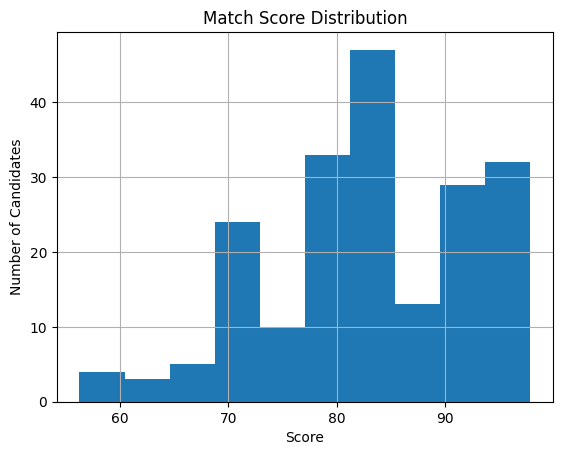

In [ ]:
import matplotlib.pyplot as plt
resume_df["match_score"].hist(bins=10)
plt.title("Match Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Candidates")
plt.show()

In [ ]:
import sqlite3

# Connect to or create database
conn = sqlite3.connect("recruitment_system.db")
cursor = conn.cursor()

# Create Candidates table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Candidates (
    candidate_id TEXT PRIMARY KEY,
    filename TEXT,
    name TEXT,
    email TEXT,
    mobile TEXT,
    education TEXT,
    experience INTEGER,
    skills TEXT,
    best_match TEXT,
    match_score REAL,
    shortlisted TEXT
)
''')

# Optional: Clear old data if re-running
cursor.execute("DELETE FROM Candidates")

# Insert resume_df into Candidates table
for _, row in resume_df.iterrows():
    cursor.execute('''
        INSERT INTO Candidates (candidate_id, filename, name, email, mobile,
                                education, experience, skills,
                                best_match, match_score, shortlisted)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['candidate_id'],
        row['filename'],
        row['name'],
        row['email'],
        row['mobile'],
        ', '.join(row['education']) if isinstance(row['education'], list) else row['education'],
        row['experience'],
        ', '.join(row['skills']) if isinstance(row['skills'], list) else row['skills'],
        row['best_match'],
        row['match_score'],
        row['shortlisted']
    ))

conn.commit()
print("✅ resume_df inserted into SQLite database.")


✅ resume_df inserted into SQLite database.


In [ ]:
# Create Interviews table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Interviews (
    interview_id INTEGER PRIMARY KEY AUTOINCREMENT,
    candidate_id TEXT,
    scheduled_date TEXT,
    interview_mode TEXT,
    email_content TEXT
)
''')

# Optional: Clear old interviews
cursor.execute("DELETE FROM Interviews")

# Fetch shortlisted candidates
shortlisted = cursor.execute("SELECT candidate_id, name, email, best_match FROM Candidates WHERE shortlisted = 'Yes'").fetchall()

# Email Template + Insert
for candidate_id, name, email, job_role in shortlisted:
    interview_date = "2025-04-10"
    mode = "Virtual (Google Meet)"
    email_body = f"""
    Subject: Interview Invitation for {job_role}

    Dear {name},

    Congratulations! Based on your profile, you have been shortlisted for the role of {job_role}.

    We would like to invite you for an interview on {interview_date} via {mode}.

    Kindly confirm your availability by replying to this email.

    Best regards,
    AI Recruitment Team
    """

    cursor.execute('''
    INSERT INTO Interviews (candidate_id, scheduled_date, interview_mode, email_content)
    VALUES (?, ?, ?, ?)
    ''', (candidate_id, interview_date, mode, email_body))

conn.commit()
print("✅ Interview emails generated and stored.")


✅ Interview emails generated and stored.


In [ ]:
for row in cursor.execute("SELECT * FROM Candidates").fetchall():
    print(row)

for row in cursor.execute("SELECT * FROM Interviews").fetchall():
    print(row)


('c7554', 'C7554.pdf', 'Amanda Miller', 'amandamiller19@gmail.com', None, 'bachelor, me, be', 8, 'machine learning, docker, aws, kubernetes, sql, python, nlp', 'Database Administrator', 85.0, 'Yes')
('c7543', 'C7543.pdf', 'Joel Smith', 'joelsmith39@gmail.com', None, 'me, be', 8, 'linux, wireshark, metasploit, network security', 'Cybersecurity Analyst', 82.05, 'Yes')
('c7733', 'C7733.pdf', 'Julia Gates', 'juliagates85@gmail.com', None, 'master, bachelor, me, be', 8, 'gcp, deep learning, docker, aws, azure, kubernetes, network security, sql, python', 'Big Data Engineer', 97.86, 'Yes')
('c5786', 'C5786.pdf', 'Angela Tate', 'angelatate96@gmail.com', None, 'master, me, be', 4, 'machine learning, docker, kubernetes, network security, sql, python', 'Software Engineer', 78.33, 'No')
('c1164', 'C1164.pdf', 'Deborah Foster', 'deborahfoster16@gmail.com', None, 'bachelor, me, be', 8, 'docker, aws, kubernetes, sql, python', 'Database Administrator', 85.0, 'Yes')
('c9677', 'C9677.pdf', 'Andrew Sloan

In [ ]:
import sqlite3

# Connect to SQLite DB (or create if it doesn't exist)
conn = sqlite3.connect("recruitment_ai.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS shortlisted_candidates (
    candidate_id TEXT PRIMARY KEY,
    name TEXT,
    email TEXT,
    mobile TEXT,
    education TEXT,
    experience INTEGER,
    skills TEXT,
    best_match TEXT,
    match_score REAL,
    interview_email TEXT
)
""")

# Insert shortlisted candidates
for _, row in resume_df[resume_df["shortlisted"] == "Yes"].iterrows():
    cursor.execute("""
    INSERT OR REPLACE INTO shortlisted_candidates (
        candidate_id, name, email, mobile, education, experience, skills,
        best_match, match_score, interview_email
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (
        row["candidate_id"],
        row["name"],
        row["email"],
        row["mobile"],
        ",".join(row["education"]),
        row["experience"],
        ",".join(row["skills"]),
        row["best_match"],
        row["match_score"],
        ""  # Will fill with email in next step
    ))

conn.commit()


In [ ]:
from datetime import datetime, timedelta
import random

def generate_interview_email(name, job_title):
    future_date = datetime.now() + timedelta(days=random.randint(2, 5))
    interview_time = random.choice(["10:00 AM", "2:00 PM", "4:30 PM"])
    return f"""
Dear {name},

Congratulations! You have been shortlisted for the position of {job_title}.

We would like to invite you for an interview scheduled on {future_date.strftime('%A, %d %B %Y')} at {interview_time}.
The interview will be conducted online via Google Meet.

Please confirm your availability by replying to this email.

Best regards,
Recruitment Team
"""

# Update the DB with interview emails
for _, row in resume_df[resume_df["shortlisted"] == "Yes"].iterrows():
    interview_email = generate_interview_email(row["name"], row["best_match"])
    cursor.execute("""
    UPDATE shortlisted_candidates
    SET interview_email = ?
    WHERE candidate_id = ?
    """, (interview_email, row["candidate_id"]))

conn.commit()
conn.close()


In [ ]:
# Reconnect to view stored candidates
conn = sqlite3.connect("recruitment_ai.db")
df = pd.read_sql_query("SELECT * FROM shortlisted_candidates", conn)
conn.close()

df.head()


,candidate_id,name,email,mobile,education,experience,skills,best_match,match_score,interview_email
0,c7554,Amanda Miller,amandamiller19@gmail.com,None,"bachelor,me,be",8,"machine learning,docker,aws,kubernetes,sql,pyt...",Database Administrator,85.00,"\nDear Amanda Miller,\n\nCongratulations! You ..."
1,c7543,Joel Smith,joelsmith39@gmail.com,None,"me,be",8,"linux,wireshark,metasploit,network security",Cybersecurity Analyst,82.05,"\nDear Joel Smith,\n\nCongratulations! You hav..."
2,c7733,Julia Gates,juliagates85@gmail.com,None,"master,bachelor,me,be",8,"gcp,deep learning,docker,aws,azure,kubernetes,...",Big Data Engineer,97.86,"\nDear Julia Gates,\n\nCongratulations! You ha..."
3,c1164,Deborah Foster,deborahfoster16@gmail.com,None,"bachelor,me,be",8,"docker,aws,kubernetes,sql,python",Database Administrator,85.00,"\nDear Deborah Foster,\n\nCongratulations! You..."
4,c3761,Gerald Taylor,geraldtaylor60@gmail.com,None,"bachelor,me,be",8,"deep learning,docker,aws,kubernetes,sql,python",Database Administrator,85.00,"\nDear Gerald Taylor,\n\nCongratulations! You ..."


In [ ]:
if not df.empty:
    print(df.loc[0, 'interview_email'])
else:
    print("No result found.")



Dear Amanda Miller,

Congratulations! You have been shortlisted for the position of Database Administrator.

We would like to invite you for an interview scheduled on Monday, 07 April 2025 at 10:00 AM.
The interview will be conducted online via Google Meet.

Please confirm your availability by replying to this email.

Best regards,
Recruitment Team



In [ ]:
import sqlite3
import pandas as pd
import smtplib
from email.message import EmailMessage

# 1. Fetch email content and recipient from DB
conn = sqlite3.connect("recruitment_ai.db")
df = pd.read_sql_query("SELECT name, email, interview_email FROM shortlisted_candidates WHERE candidate_id = 'c7554'", conn)
conn.close()

if df.empty:
    print("❌ No shortlisted candidate found.")
else:
    candidate_name = df.loc[0, 'name']
    recipient_email = df.loc[0, 'email']
    email_body = df.loc[0, 'interview_email']

    # ✅ Check if candidate email exists (is not empty, None, or blank)
    if not recipient_email or recipient_email.strip() == "":
        print(f"❌ Email doesn't exist for candidate '{candidate_name}'. Found: '{recipient_email}'")
    else:
        print(f"📩 Candidate email found: {recipient_email}")

        # The actual sending part can be skipped since it's dummy data
        print(f"📨 Email (mock) would be sent to {candidate_name} at {recipient_email}")
        # If you ever want to really send it, uncomment below:

        # sender_email = "your_email@gmail.com"
        # app_password = "your_app_password"
        # msg = EmailMessage()
        # msg['Subject'] = "Interview Invitation - Recruitment AI"
        # msg['From'] = sender_email
        # msg['To'] = recipient_email
        # msg.set_content(email_body)
        # with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
        #     smtp.login(sender_email, app_password)
        #     smtp.send_message(msg)
        # print(f"✅ Email sent to {candidate_name} ({recipient_email})")


📩 Candidate email found: amandamiller19@gmail.com
📨 Email (mock) would be sent to Amanda Miller at amandamiller19@gmail.com
